## Bike Sharing Assignment 

### Steps involved

1. Reading, Understanding and Visulaizing the data
2. Preaparing the data for modeling (encoding, train-test split, scaling)
3. Training the model on training set 
4. Residual Analysis
5. Predicting and Evaluating the model on test set 

In [1]:
# importing libraries 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 

In [2]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# to display 50 columns (if exist)

pd.set_option('display.max_columns', 50)

In [4]:
# read the data 

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

# there are no missing values in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### dropping irrelevant columns

In [8]:
# dropping the instant column as it just contains the index of the record (data)

# dropping (dteday) variable considering it as redundant as we have another variable (yr and mnth) 
# which represents the same (0 => 2018, 1=> 2019)

# dropping casual and registered variables as cnt which is a target variable will be sufficient as 
# it gives the count of total user

df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

##### Converting the values of variables for ease of interpretation

In [9]:
# converting season variable (1:spring, 2:summer, 3:fall, 4:winter)

l = ['season']

df[l]= df[l].apply(lambda x : x.map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}))

In [10]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# mapping yr columns (0 : 2018, 1 : 2019)

l = ['yr']

df[l] = df[l].apply(lambda x : x.map({0 : '2018', 1 : '2019'}))

In [12]:
df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [13]:
# converting month variable to the names of month for ease of reading and understanding

l = ['mnth']

df[l] = df[l].apply(lambda x :  x.map({1 : 'january', 2 : 'february', 3 : 'march', 4 : 'april', 5 : 'may',
                                       6 : 'june', 7 : 'july', 8 : 'august', 9 : 'september', 10 : 'october',
                                       11 : 'november', 12 : 'december' }))

In [14]:
df.mnth.unique()

array(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december'],
      dtype=object)

In [15]:
# mapping weathersit variable 

l = ['weathersit']

df[l] = df[l].apply(lambda x : x.map({1 : 'clear', 2 : 'mist', 3 : 'rainy', 4 : 'thunder'}))

In [16]:
df.weathersit.value_counts()

# therefore, there are no records present in the dataset for 'thunder' category

clear    463
mist     246
rainy     21
Name: weathersit, dtype: int64

In [17]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,january,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,january,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,january,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,january,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,january,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,december,0,5,1,mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,december,0,6,0,mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,december,0,0,0,mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,december,0,1,1,clear,10.489153,11.58500,48.3333,23.500518,1796


##### Visualising the data

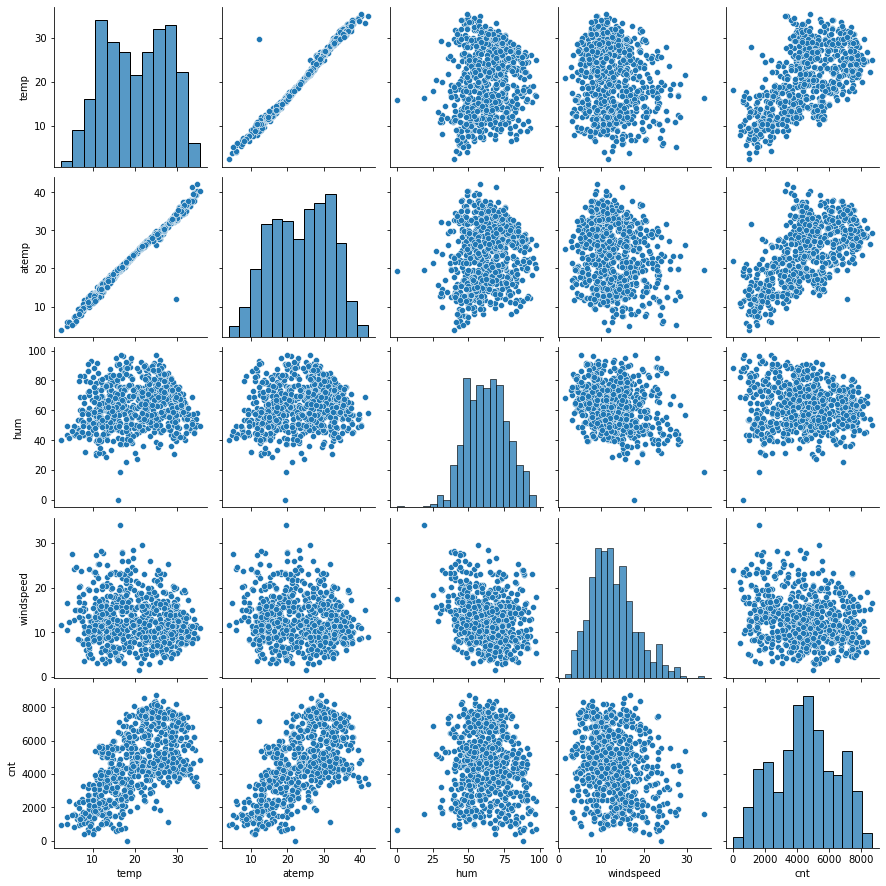

In [18]:
# visualising the numerical variables 

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

sns.pairplot(df[num_vars])
plt.show()

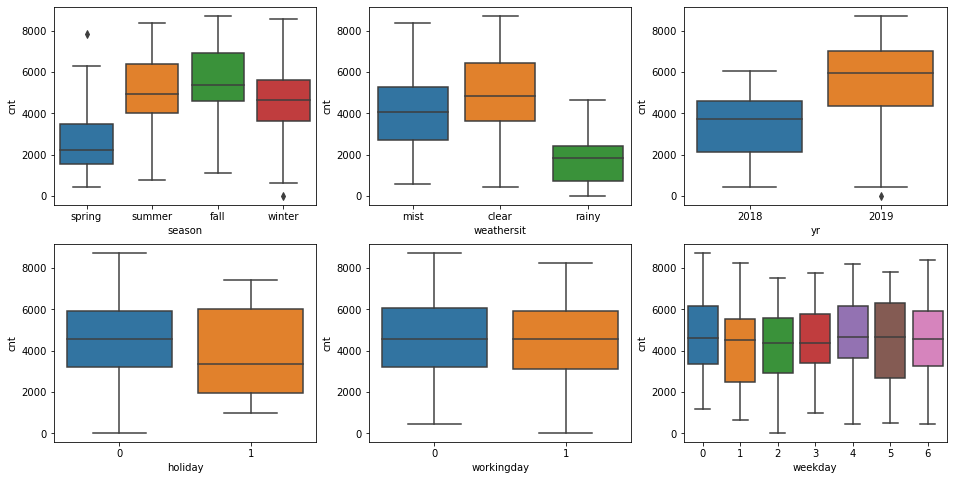

In [19]:
# visualising the categorical variables 

plt.figure(figsize = (16,8))

plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'season', y = 'cnt')

plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'weathersit', y = 'cnt')

plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'yr', y = 'cnt')

plt.subplot(2,3,4)
sns.boxplot(data = df, x = 'holiday', y = 'cnt')

plt.subplot(2,3,5)
sns.boxplot(data = df, x = 'workingday', y = 'cnt')

plt.subplot(2,3,6)
sns.boxplot(data = df, x = 'weekday', y = 'cnt')

plt.show()

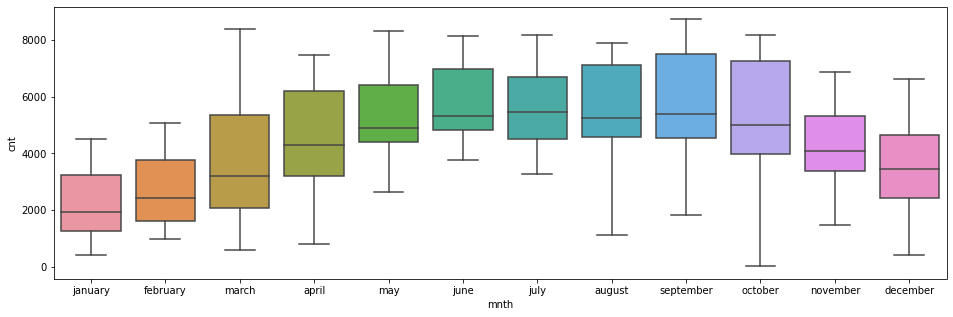

In [20]:
plt.figure(figsize = (16, 5))
sns.boxplot(data = df, x = 'mnth', y = 'cnt')
plt.show()

##### Inferences that can be drawn for the above plots

1. There is a positive correlation between atemp, temp and cnt which is obvious as users will be quite comfortable in using bikes when feeling temperature is high

2. There is a very slight negative trend between hum and cnt 

3. Users are pretty high in number in fall and summer and its very low in spring season 

4. The number of users are too low in rainy weather as most of the pupils dont prefer riding a bike in those snow or rainy weather conditions whereas it is high in clear weather conditions

5. We can see a spike in trend of number of users using the bike from 2018 to 2019 

6. Although the upper bound values are irrespective of the holiday, lower bound value is quite high for non holiday days 

7. Interesting fact is that, irrespective of the kind of day (working day or not) the number of users are almost the same 

8. The number of users are high in the month of june followed by may and july whereas it is very low in the month of january and february 

### Step 2 : Preparing the data for modeling 

#### 1. Encoding

- converting binary categorical variables to 1s and 0s
- creating dummy variables for other categorical variables

In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,january,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,january,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,january,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,january,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,january,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# creating dummy variables for season, yr, mnth and weathersit variables

ses = pd.get_dummies(df.season, drop_first = True)

year = pd.get_dummies(df.yr, drop_first = True)

month = pd.get_dummies(df.mnth, drop_first = True)

weather = pd.get_dummies(df.weathersit, drop_first = True)

In [23]:
# merging the dateframe(df) with created dummy variables

df = pd.concat([df, ses, year, month, weather], axis = 1)

In [24]:
# dropping the redundant variables

df.drop(['season', 'yr', 'mnth', 'weathersit'], axis = 1, inplace = True)

In [25]:
df.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,august,december,february,january,july,june,march,may,november,october,september,mist,rainy
0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(730, 25)

#### 2. Train - Test Split

In [27]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [28]:
df_train.shape

(510, 25)

In [29]:
df_test.shape

(220, 25)

#### 3. Rescaling the variables (features)

In [30]:
df.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,august,december,february,january,july,june,march,may,november,october,september,mist,rainy
0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [31]:
# 1. instantiate an object 

scaler = MinMaxScaler()

In [32]:
# creating the list of numerical variables for rescaling 

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'weekday']

In [33]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.describe()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,august,december,february,january,july,june,march,may,november,october,september,mist,rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.491830,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.345098,0.029412
std,0.157763,0.329528,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


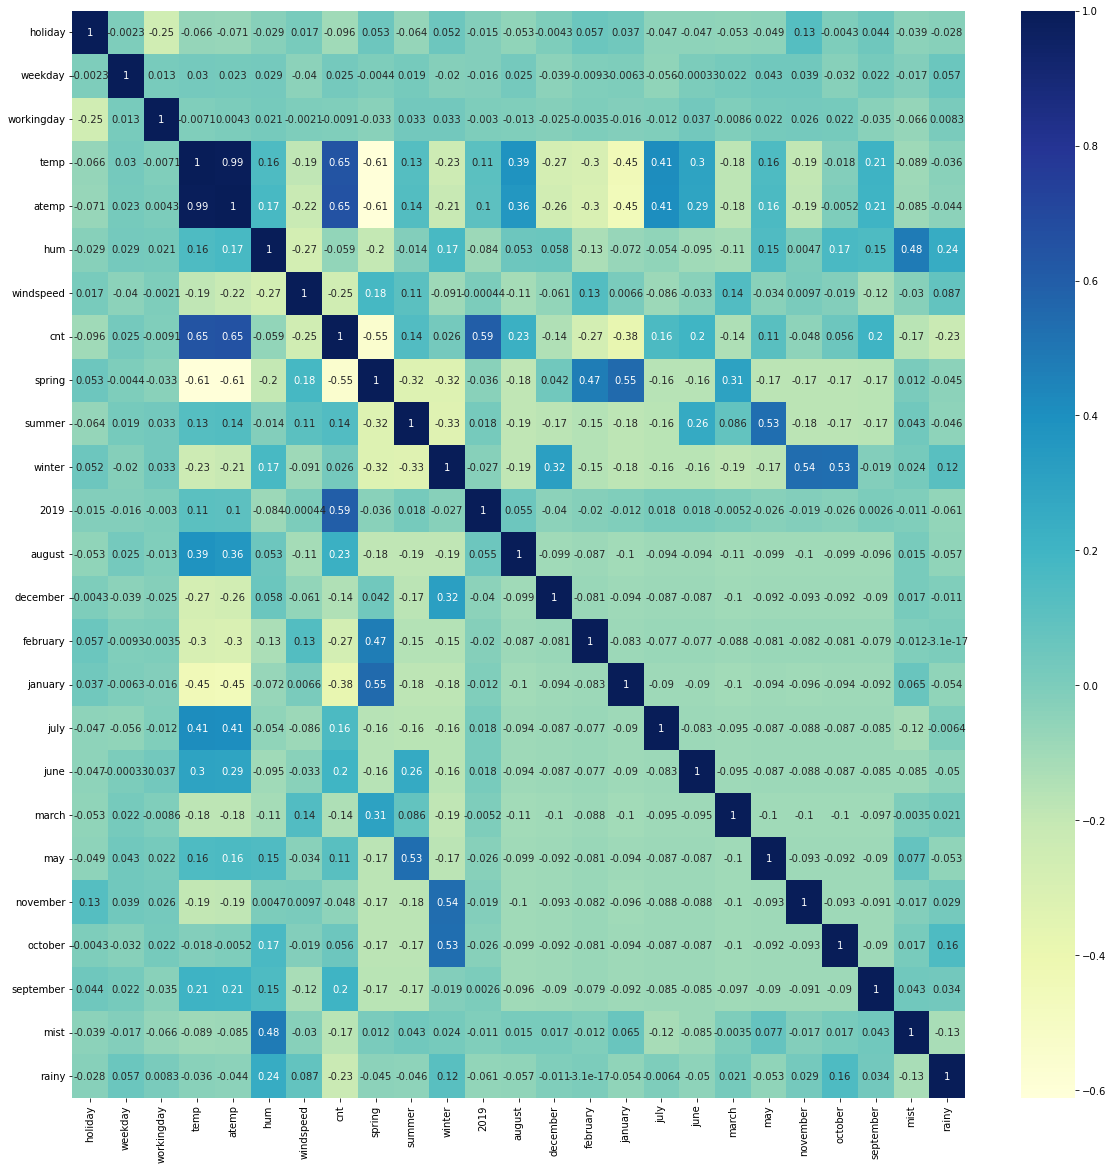

In [35]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

##### Inferences that can be drawn from above correlation matrix

1. Having said that, there is a high positive correlation between cnt and atemp, temp variable 
2. There is a very slight negative trend between hum and cnt variable
3. There is a positive correlation between 2019 and cnt (which implies that users are increasing annualy)
4. There is a negative correlation between cnt and january and februaury which we analysed before 
5. There is a positive correlation between cnt and may and september 

### Step 3 : Building a Linear Model

In [36]:
# Dividing the training set into X_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [37]:
X_train.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,august,december,february,january,july,june,march,may,november,october,september,mist,rainy
576,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
426,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
728,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
482,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
111,0,0.000000,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Model 1

Building a model with all the variables

In [38]:
X_train_sm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_sm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     113.0
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          2.16e-181
Time:                        14:16:20   Log-Likelihood:                 519.84
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     485   BIC:                            -883.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3329      0.044      7.495      0.0

#### Variance Inflation Factor (VIF)

In [39]:
vif = pd.DataFrame()

vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,435.78
4,atemp,381.68
5,hum,37.95
7,spring,11.69
9,winter,11.63
8,summer,6.79
20,october,6.26
19,november,6.08
11,august,5.88
6,windspeed,5.34


##### We could have values with 

1. high p, high vif (blindly drop)
2. high - low
   -  high p, low vif (drop first)
   - high vif, low p (drop after dropping above)
3. low p, low vif (dont drop)

### Model 2

dropping atemp variable as both p-value and VIF are high

In [40]:
X = X_train.drop('atemp', axis = 1)

In [41]:
X_train_sm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_sm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.1
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          2.18e-182
Time:                        14:16:20   Log-Likelihood:                 519.73
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     486   BIC:                            -889.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3330      0.044      7.502      0.0

In [42]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
4,hum,37.90
3,temp,36.92
6,spring,11.66
8,winter,11.60
7,summer,6.75
19,october,6.26
18,november,6.08
10,august,5.76
13,january,5.19
14,july,5.15


### Model 3 

dropping march variable as p-value = 0.867

In [43]:
X = X.drop('march', axis = 1)

In [44]:
X_train_sm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_sm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          1.97e-183
Time:                        14:16:20   Log-Likelihood:                 519.71
No. Observations:                 510   AIC:                            -993.4
Df Residuals:                     487   BIC:                            -896.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3357      0.041      8.107      0.0

In [45]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,36.92
4,hum,35.98
8,winter,10.47
6,spring,8.10
7,summer,6.74
10,august,5.48
5,windspeed,5.04
18,october,4.97
14,july,4.96
17,november,4.85


### Model 4 

dropping october variable as p-value = 0.915

In [46]:
X = X.drop('october', axis = 1)

In [47]:
X_train_sm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_sm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          1.71e-184
Time:                        14:16:21   Log-Likelihood:                 519.71
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     488   BIC:                            -902.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3365      0.041      8.285      0.0

In [48]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,35.95
4,hum,34.73
6,spring,8.00
8,winter,6.85
7,summer,5.97
5,windspeed,4.98
10,august,4.82
14,july,4.41
2,workingday,3.71
1,weekday,3.25


### Model 5

dropping june variable as p-value = 0.853

In [49]:
X = X.drop('june', axis = 1)

In [50]:
X_train_sm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_sm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          1.47e-185
Time:                        14:16:21   Log-Likelihood:                 519.69
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     489   BIC:                            -908.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3369      0.041      8.312      0.0

In [51]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
4,hum,34.14
3,temp,21.79
6,spring,7.27
8,winter,5.89
7,summer,5.78
5,windspeed,4.93
2,workingday,3.71
1,weekday,3.24
10,august,3.11
14,july,2.77


### Model 6 

dropping weekday variable

In [52]:
X = X.drop('weekday', axis = 1)

In [53]:
X_train_sm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_sm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          2.38e-186
Time:                        14:16:21   Log-Likelihood:                 518.98
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     490   BIC:                            -913.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3431      0.040      8.538      0.0

In [54]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,hum,34.03
2,temp,21.28
5,spring,7.16
7,winter,5.87
6,summer,5.73
4,windspeed,4.93
1,workingday,3.70
9,august,3.10
13,july,2.77
12,january,2.41


### Model 7 

dropping august variable 

In [55]:
X = X.drop('august', axis = 1)

In [56]:
X_train_sm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_sm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.8
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          2.52e-187
Time:                        14:16:21   Log-Likelihood:                 518.68
No. Observations:                 510   AIC:                            -999.4
Df Residuals:                     491   BIC:                            -918.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3533      0.038      9.340      0.0

In [57]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,hum,32.45
2,temp,18.55
5,spring,5.48
4,windspeed,4.86
7,winter,4.10
1,workingday,3.70
6,summer,3.38
11,january,2.38
16,mist,2.37
8,2019,2.10


### Model 8 

droping workingday variable 

In [58]:
X = X.drop('workingday', axis = 1)

In [59]:
X_train_sm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_sm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.3
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          1.73e-187
Time:                        14:16:21   Log-Likelihood:                 516.41
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     492   BIC:                            -920.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3413      0.038      9.097      0.0

In [60]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,hum,31.55
1,temp,18.39
4,spring,5.45
3,windspeed,4.83
6,winter,4.07
5,summer,3.34
10,january,2.38
15,mist,2.33
7,2019,2.10
9,february,1.92


### Model 9 

dropping may variable

In [61]:
X = X.drop('may', axis = 1)

In [62]:
X_train_sm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_sm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          2.94e-188
Time:                        14:16:21   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3313      0.037      9.023      0.0

In [63]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,hum,31.52
1,temp,18.33
4,spring,5.45
3,windspeed,4.73
6,winter,4.07
5,summer,2.82
10,january,2.38
14,mist,2.33
7,2019,2.09
9,february,1.92


### Model 10 

dropping february variable

In [64]:
X = X.drop('february', axis = 1)

In [65]:
X_train_sm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_sm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          8.15e-189
Time:                        14:16:21   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [66]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,hum,30.89
1,temp,17.79
3,windspeed,4.72
4,spring,4.37
6,winter,4.06
5,summer,2.82
13,mist,2.32
7,2019,2.09
11,november,1.85
9,january,1.75


### Model 11

dropping december variable

In [67]:
X = X.drop('december', axis = 1)

In [68]:
X_train_sm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_sm).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          4.41e-189
Time:                        14:16:21   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3032      0.035      8.598      0.0

In [69]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,hum,29.09
1,temp,16.80
3,windspeed,4.72
4,spring,4.37
6,winter,3.78
5,summer,2.80
12,mist,2.29
7,2019,2.09
8,january,1.67
10,november,1.60


### Model 12 

dropping november variable

In [70]:
X = X.drop('november', axis = 1)

In [71]:
X_train_sm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_sm).fit()

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          7.59e-190
Time:                        14:16:21   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2964      0.035      8.483      0.0

In [72]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,hum,29.02
1,temp,16.71
3,windspeed,4.66
4,spring,4.34
6,winter,3.36
5,summer,2.79
11,mist,2.29
7,2019,2.09
8,january,1.67
9,july,1.59


### Model 13

dropping january variable

In [73]:
X = X.drop('january', axis = 1)

In [74]:
X_train_sm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_sm).fit()

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          2.95e-190
Time:                        14:16:21   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.0

In [75]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,hum,28.03
1,temp,16.03
3,windspeed,4.65
4,spring,4.01
6,winter,3.33
5,summer,2.79
10,mist,2.28
7,2019,2.08
8,july,1.58
9,september,1.38


### Model 14 

dropping hum variable due to high VIF 

In [76]:
X = X.drop('hum', axis =1)

In [77]:
X_train_sm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_sm).fit()

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          5.06e-187
Time:                        14:16:21   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [78]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.23
3,spring,2.08
6,2019,2.07
5,winter,1.78
7,july,1.58
9,mist,1.55
8,september,1.34
10,rainy,1.08


### Model 15 (Final Model)

dropping july variable eventhough VIF pf windspeed and temp is high as we are not ready to drop thoose featured because of their significance in predicting the target variable.

In [79]:
X = X.drop('july', axis = 1)

In [80]:
X_train_sm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_sm).fit()

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          1.47e-186
Time:                        14:16:22   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

In [81]:
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,windspeed,4.60
1,temp,3.84
6,2019,2.07
3,spring,1.99
4,summer,1.90
5,winter,1.63
8,mist,1.55
7,september,1.23
9,rainy,1.08
0,holiday,1.04


### Step 4 : Residual Analysis

In [82]:
# predict the value of y for train set 

y_train_pred = lr_15.predict(X_train_sm)

In [83]:
# calculate residual (difference of actual y and predicted y)

res = y_train - y_train_pred

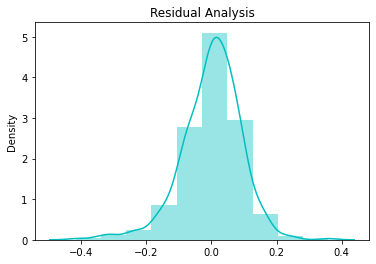

In [84]:
# check whether the residuals are normally distributed or not

sns.distplot(res, bins = 10, color =  'c')
plt.title('Residual Analysis')
plt.show()

# we could see that residuals are normally distributed and centred at mean = 0

### Step 5 : Predicting and Evaluating the model on test set

In [85]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'weekday']

In [86]:
# scaling the numerical variables 

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [87]:
df_test.describe()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,august,december,february,january,july,june,march,may,november,october,september,mist,rainy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.516667,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.318182,0.027273
std,0.187620,0.342307,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# splitting the test set into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [89]:
# adding constant

X_test_sm = sm.add_constant(X_test)

In [90]:
# dropping the variables which we have dropped in training set

X_test_sm.drop(['atemp', 'march', 'october', 'june', 'weekday', 'august', 'workingday','may', 
                'february', 'december', 'november', 'january', 'hum', 'july'], axis = 1, inplace =True)

In [91]:
X_test_sm.head()

,const,holiday,temp,windspeed,spring,summer,winter,2019,september,mist,rainy
184,1.0,1,0.831783,0.084219,0,0,0,0,0,1,0
535,1.0,0,0.901354,0.153728,0,1,0,1,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0


In [92]:
# calculating y_test_pred

y_test_pred = lr_15.predict(X_test_sm)

In [93]:
# calculating r-square for both test set and train set 

r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)

print(f'r2_train : {r2_train}')
print(f'r2_test : {r2_test}')

r2_train : 0.8327073211549113
r2_test : 0.8038195990728842


##### Since r2_test > (95% r2_train), the model is considered to be significant 

### Evaluating the model

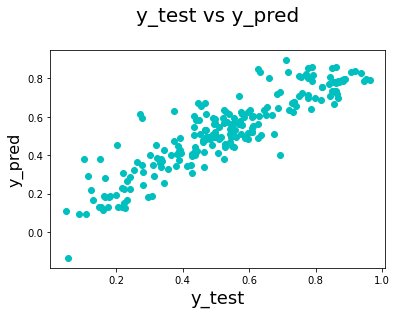

In [94]:
plt.scatter(y_test, y_test_pred, color = 'c')
plt.title('y_test vs y_pred\n', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## Therefore, the equation of a model is given by

cnt = 0.1909 - (0.096 x holiday) + (0.477 x temp) - (0.148 x windspeed) - (0.055 x spring) + (0.062 x summer) + (0.094 x winter) + (0.234 x '2019') + (0.091 x september) - (0.078 x mist) - (0.28 x rainy) 

### Top 3 most important predictor variables: 

- Temperature (temp) - A coefficient value of ‘0.477’ indicates that a unit increase in temp variable increases the bike hire numbers by 0.477 units.


- Year (2019) - A coefficient value of ‘0.234’ indicates that 0.234 unit of increase in bookings can be seen yearly. 


- Rainy weather (rainy) - A coefficient value of ‘-0.28’ indicates that, if the weather condition is of storm or thundering or rainy, the bookings will be declined by 0.28 units.

#### Other important predictor variables

- Windspeed - A coefficient value of ‘-0.148’ indicates that a unit increase in windspeed decreases the bike hire numbers by 0.148 units.


- Number of bike hires are said to increase in the month of september and in summer and winter season by 0.091, 0.062 and 0.094 respectively


- Number of bookings are said to decline in holidays, in spring season and in misty weather conditions by 0.096, 0.055 and 0.078 respectively

#### ---------------------------------------------------------------------- THE END ----------------------------------------------------------------------------------